In [72]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/test.csv
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/sample_submission.csv


# 데이터 불러오기

In [73]:
pd.options.display.max_columns = 500
train = pd.read_csv("/kaggle/input/home-data-for-ml-course/train.csv")
train.head()

# 거리 기반 모델, 두 모델의 거리가 멀수록 앙상블 효과가 크다

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [74]:
train = train.drop(train[(train["GrLivArea"] > 4000) & (train["SalePrice"] < 300000)].index)
train = train.drop(train[(train["GarageArea"] > 1200) & (train["SalePrice"] < 300000)].index)

In [75]:
train.corr()["SalePrice"].sort_values(ascending = False)
# 판매량에 대한 상관관계 오름차순으로 보기 
# -> 거리기반 선형모델을 도입하면, 트리 모델의 약점을 보완해줄 수 있다

SalePrice        1.000000
OverallQual      0.796004
GrLivArea        0.734565
TotalBsmtSF      0.651286
GarageCars       0.645516
GarageArea       0.641664
1stFlrSF         0.631771
FullBath         0.561666
TotRmsAbvGrd     0.537596
YearBuilt        0.522756
YearRemodAdd     0.506672
GarageYrBlt      0.487762
MasVnrArea       0.482221
Fireplaces       0.469387
BsmtFinSF1       0.410350
LotFrontage      0.373164
WoodDeckSF       0.326133
2ndFlrSF         0.320730
OpenPorchSF      0.320688
HalfBath         0.283578
LotArea          0.269693
BsmtFullBath     0.228782
BsmtUnfSF        0.214018
BedroomAbvGr     0.167453
ScreenPorch      0.111422
PoolArea         0.099551
MoSold           0.046209
3SsnPorch        0.044565
BsmtFinSF2      -0.011533
BsmtHalfBath    -0.016981
MiscVal         -0.020285
Id              -0.020683
LowQualFinSF    -0.025689
YrSold          -0.029424
OverallCond     -0.079188
MSSubClass      -0.084319
EnclosedPorch   -0.128896
KitchenAbvGr    -0.136140
Name: SalePr

# 선형모델의 전처리

 1-1. 각각의 칼럼들의 범위에 대해 모든 칼럼들의 범위가 다르면, 가중치가 다르게 학습한다.
 
 1-2. 칼럼의 범위가 더 넓어버리면, 더 중요하다 생각하고 가중치를 더 준다. (착각해버릴 수 있다 -> 맞춰줘야함) ==> Scaling을 해야함, 정규화

 2. 거리기반 모델은 사과,바나나,배를 1,2,3으로 할 때, 2를 더 크다 생각함 -> 카테고리는 각각 독립적인데 순서가 있다고 착각, 잘못학습 
    => one-hot encoding을 적용한다

In [76]:
test = pd.read_csv("/kaggle/input/home-data-for-ml-course/test.csv")
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [77]:
alldata = pd.concat( [train,test] , sort=False)
alldata

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,

In [78]:
alldata["old"] = alldata["YrSold"]-alldata["YearBuilt"]

SalePrice        1.000000
OverallQual      0.796004
GrLivArea        0.734565
TotalBsmtSF      0.651286
GarageCars       0.645516
GarageArea       0.641664
1stFlrSF         0.631771
FullBath         0.561666
TotRmsAbvGrd     0.537596
YearBuilt        0.522756
YearRemodAdd     0.506672
GarageYrBlt      0.487762
MasVnrArea       0.482221
Fireplaces       0.469387
BsmtFinSF1       0.410350
LotFrontage      0.373164
WoodDeckSF       0.326133
2ndFlrSF         0.320730
OpenPorchSF      0.320688
HalfBath         0.283578
LotArea          0.269693
BsmtFullBath     0.228782
BsmtUnfSF        0.214018
BedroomAbvGr     0.167453
ScreenPorch      0.111422
PoolArea         0.099551
MoSold           0.046209
3SsnPorch        0.044565
BsmtFinSF2      -0.011533
BsmtHalfBath    -0.016981
MiscVal         -0.020285
Id              -0.020683
LowQualFinSF    -0.025689
YrSold          -0.029424
OverallCond     -0.079188
MSSubClass      -0.084319
EnclosedPorch   -0.128896
KitchenAbvGr    -0.136140
old         

In [79]:
alldata["totalarea"] = alldata["GrLivArea"]+alldata["TotalBsmtSF"] 

SalePrice        1.000000
totalarea        0.829116
OverallQual      0.796004
GrLivArea        0.734565
TotalBsmtSF      0.651286
GarageCars       0.645516
GarageArea       0.641664
1stFlrSF         0.631771
FullBath         0.561666
TotRmsAbvGrd     0.537596
YearBuilt        0.522756
YearRemodAdd     0.506672
GarageYrBlt      0.487762
MasVnrArea       0.482221
Fireplaces       0.469387
BsmtFinSF1       0.410350
LotFrontage      0.373164
WoodDeckSF       0.326133
2ndFlrSF         0.320730
OpenPorchSF      0.320688
HalfBath         0.283578
LotArea          0.269693
BsmtFullBath     0.228782
BsmtUnfSF        0.214018
BedroomAbvGr     0.167453
ScreenPorch      0.111422
PoolArea         0.099551
MoSold           0.046209
3SsnPorch        0.044565
BsmtFinSF2      -0.011533
BsmtHalfBath    -0.016981
MiscVal         -0.020285
Id              -0.020683
LowQualFinSF    -0.025689
YrSold          -0.029424
OverallCond     -0.079188
MSSubClass      -0.084319
EnclosedPorch   -0.128896
KitchenAbvGr

In [80]:
alldata["houseQual"] = alldata["OverallQual"]+alldata["OverallCond"] 

SalePrice        1.000000
totalarea        0.829116
OverallQual      0.796004
GrLivArea        0.734565
TotalBsmtSF      0.651286
GarageCars       0.645516
GarageArea       0.641664
1stFlrSF         0.631771
houseQual        0.596714
FullBath         0.561666
TotRmsAbvGrd     0.537596
YearBuilt        0.522756
YearRemodAdd     0.506672
GarageYrBlt      0.487762
MasVnrArea       0.482221
Fireplaces       0.469387
BsmtFinSF1       0.410350
LotFrontage      0.373164
WoodDeckSF       0.326133
2ndFlrSF         0.320730
OpenPorchSF      0.320688
HalfBath         0.283578
LotArea          0.269693
BsmtFullBath     0.228782
BsmtUnfSF        0.214018
BedroomAbvGr     0.167453
ScreenPorch      0.111422
PoolArea         0.099551
MoSold           0.046209
3SsnPorch        0.044565
BsmtFinSF2      -0.011533
BsmtHalfBath    -0.016981
MiscVal         -0.020285
Id              -0.020683
LowQualFinSF    -0.025689
YrSold          -0.029424
OverallCond     -0.079188
MSSubClass      -0.084319
EnclosedPorc

# one-hot encoding
numerical column이 아닌 것(categorical columns)을 전처리한다.

In [81]:
alldata["MSSubClass"] = alldata["MSSubClass"].astype(object)
# alldata["MSSubClass"]는 원래 categorical column이라 one-hot인코딩이 적용안되서 타입을 object로 바꾼 후 적용

alldata2 = pd.get_dummies(alldata)
alldata2 = alldata2.drop(["Id","SalePrice"], axis=1)

In [82]:
# 결측치 처리
alldata2 = alldata2.fillna(-1)

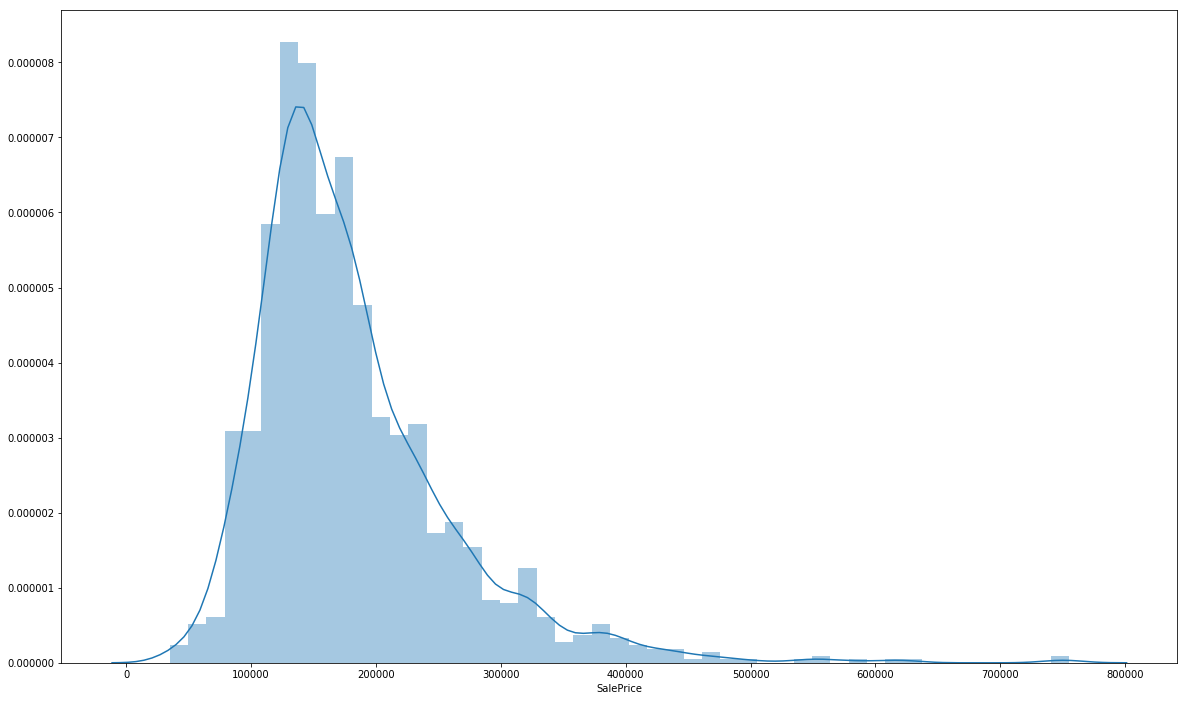

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20,12))
sns.distplot(train["SalePrice"])

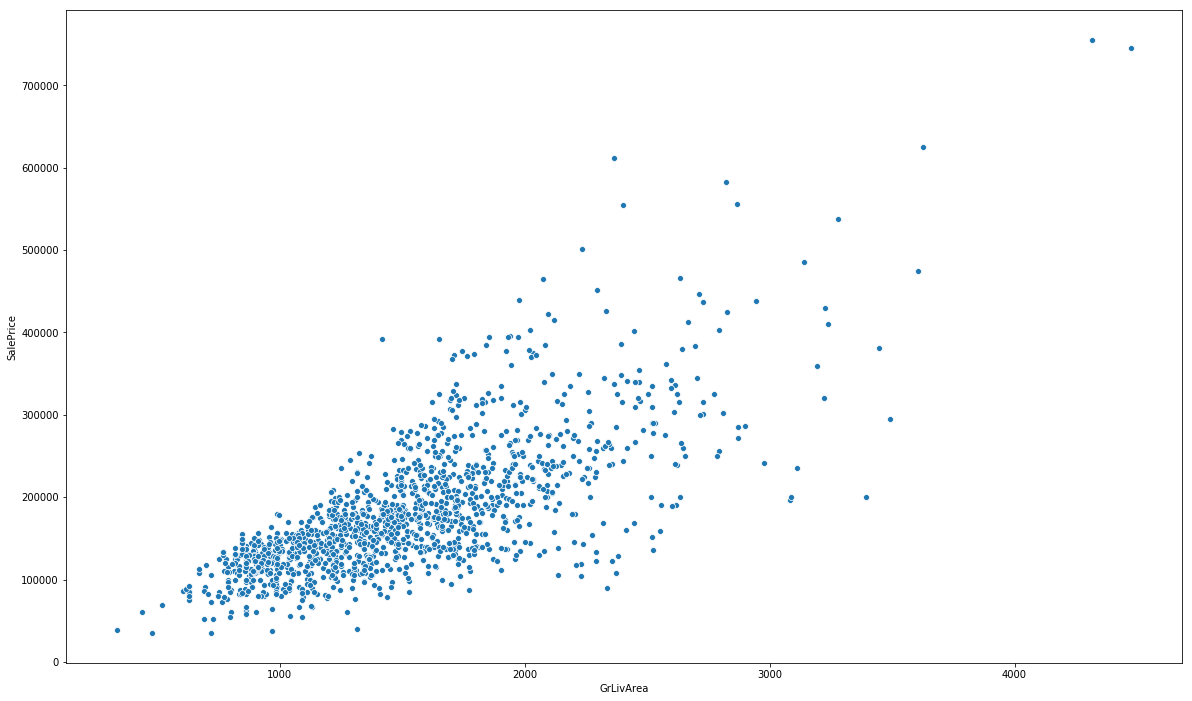

In [84]:
plt.figure(figsize=(20,12))
sns.scatterplot(train["GrLivArea"],train["SalePrice"])
# 우상향 회귀직선, outlier확인
# outlier가 규제를 많이 받게 함

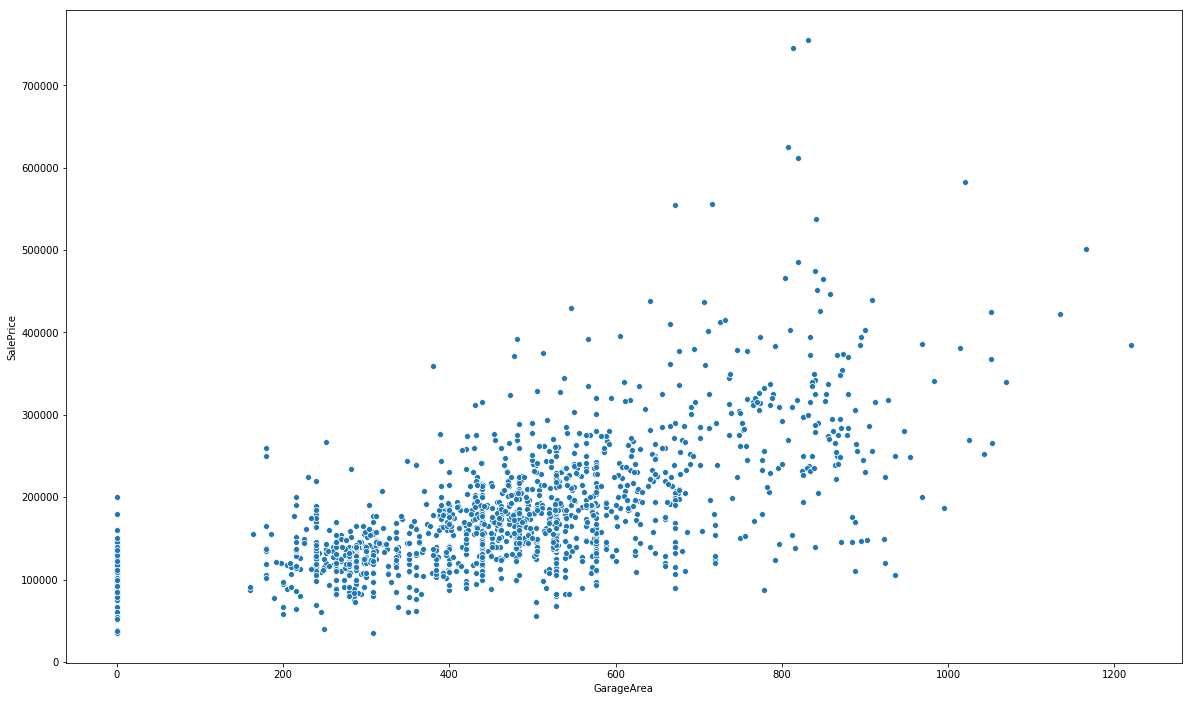

In [85]:
plt.figure(figsize=(20,12))
sns.scatterplot(train["GarageArea"],train["SalePrice"])

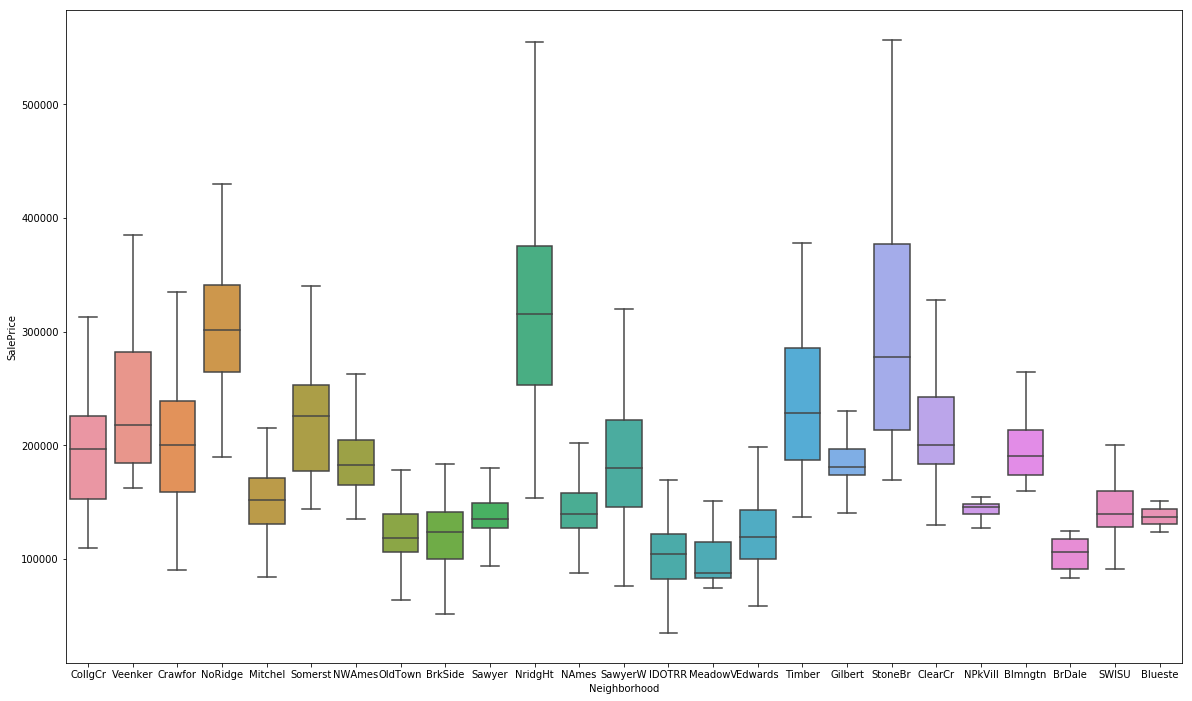

In [86]:
plt.figure(figsize=(20,12))
sns.boxplot(train["Neighborhood"],train["SalePrice"], showfliers = False)

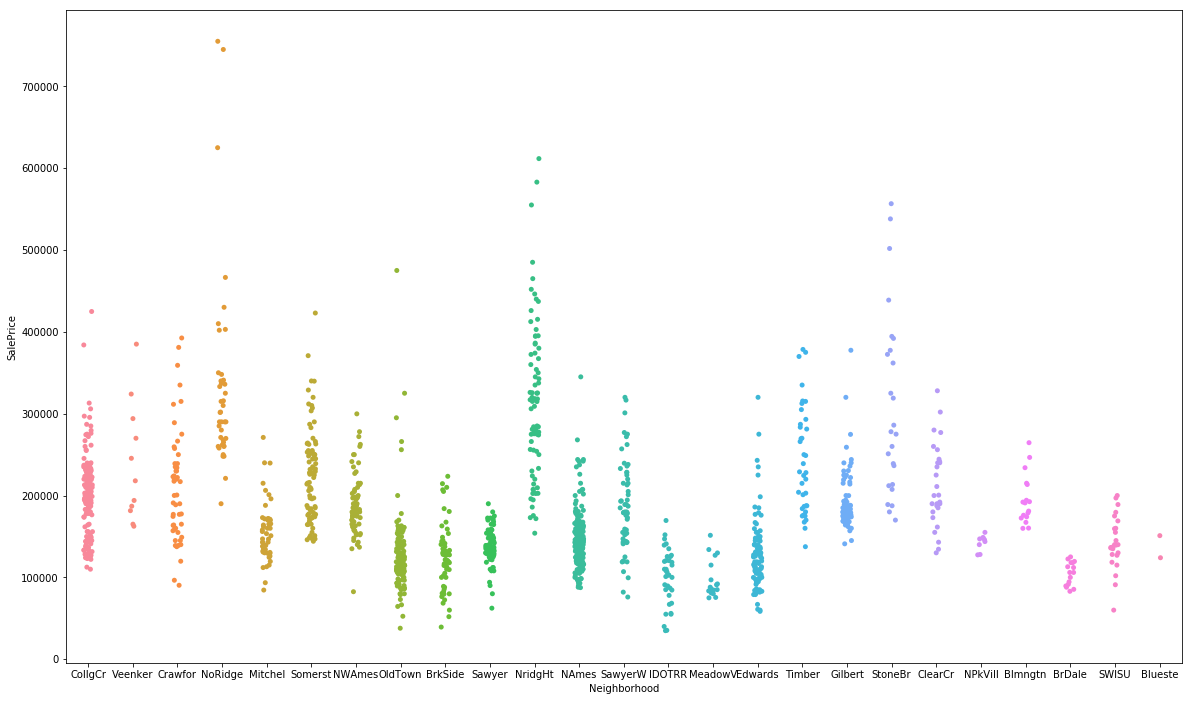

In [87]:
plt.figure(figsize=(20,12))
sns.stripplot(train["Neighborhood"],train["SalePrice"])

# Scaling(정규화) 하기
데이터의 독립 변수 또는 feature의 범위를 정규화하는 데 사용되는 방법이다. 

데이터 처리에서는 데이터 정규화라고도 하며 일반적으로 데이터 전처리 단계에서 수행된다.

In [88]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

alldata3 = ss.fit_transform(alldata2)
print(alldata3)

[[ 0.2254606  -0.21522993  0.64943883 ... -0.12664538  0.46278145
  -0.30094661]
 [ 0.67473723 -0.06774196 -0.06228165 ... -0.12664538  0.46278145
  -0.30094661]
 [ 0.31531593  0.14387121  0.64943883 ... -0.12664538  0.46278145
  -0.30094661]
 ...
 [ 3.07087926  1.26606228 -0.77400213 ... -0.12664538 -2.16084722
  -0.30094661]
 [ 0.13560528  0.04011663 -0.77400213 ... -0.12664538  0.46278145
  -0.30094661]
 [ 0.49502658 -0.0642792   0.64943883 ... -0.12664538  0.46278145
  -0.30094661]]


In [89]:
train3 = alldata3[:len(train)] 
test3 = alldata3[len(train):]

# 선형모델 설계

- 선형칼럼은 모든 것을 중요하다 생각한다 

- 내부적으로 규제하는 옵션(과적합하는 것은 학습안하게)을 포함하는 모델을 불러오기


In [90]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import cross_val_score

for i in [20,50,100,200,300,500,700,1000]:
    ridgecv = RidgeCV(alphas = [i])          # alpha옵션이 규제의 정도, L2정규화 -> 과적합을 줄이기

    # 점수가 잘나오는 것 내부적으로 골라서 선택하기, 높으면 높을수록 좋음, 
    # 하지만 error는 높을수록 안좋음 -> neg_ 붙여줌
    cvs = -cross_val_score(ridgecv, train3, train["SalePrice"], cv=10, n_jobs = -1, scoring = "neg_root_mean_squared_error").mean()
    print(cvs)


ridgecv = RidgeCV(alphas = [300])
ridgecv.fit(train3,np.log(train["SalePrice"]))
result = ridgecv.predict(test3)


25796.152449725858
25411.31250635162
25084.17567692944
24787.890566001046
24676.44656704827
24684.8695386305
24842.81287491846
25211.116128111986


In [91]:
sub = pd.read_csv("/kaggle/input/home-data-for-ml-course/sample_submission.csv")
sub.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [92]:
sub["SalePrice"] = np.exp(result)
sub.head()

,Id,SalePrice
0,1461,120810.809083
1,1462,160894.395608
2,1463,180673.524289
3,1464,198578.440595
4,1465,195455.711348


In [93]:
sub.to_csv("sub.csv", index=False)

# Scroe : 13659.55894
